### Importing the libraries

In [49]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras.datasets import mnist

### Preprocessing the Training set and Test Set

In [50]:
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = to_categorical(y_train, num_classes=10)
Y_test = to_categorical(y_test, num_classes=10)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


### Building the CNN

In [51]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(16, (3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the CNN

In [48]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history=model.fit(X_train, Y_train, batch_size=128, epochs=30, validation_data=(X_test, Y_test),callbacks=[early_stop])

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9627 - loss: 0.1281 - val_accuracy: 0.9798 - val_loss: 0.0613
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9737 - loss: 0.0917 - val_accuracy: 0.9834 - val_loss: 0.0490
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9781 - loss: 0.0731 - val_accuracy: 0.9822 - val_loss: 0.0500
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9803 - loss: 0.0631 - val_accuracy: 0.9842 - val_loss: 0.0394
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9838 - loss: 0.0529 - val_accuracy: 0.9869 - val_loss: 0.0391
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9844 - loss: 0.0478 - val_accuracy: 0.9865 - val_loss: 0.0393
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9871 - loss: 0.0414 - val_accuracy: 0.9869 - val_loss: 0.0375
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9873 - loss: 0.0388 - val_accuracy: 0.

In [52]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       346,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,690 (1.33 MB)

 Trainable params: 347,690 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

### Evaluating the CNN

In [53]:
test_scores = model.evaluate(X_test, Y_test, verbose=2)
loss_cnn = test_scores[0]*100
accuracy_cnn =  test_scores[1]*100
print('Test loss:', loss_cnn)
print('Test accuracy:', accuracy_cnn)

313/313 - 2s - 5ms/step - accuracy: 0.1242 - loss: 2.2974
Test loss: 229.736328125
Test accuracy: 12.42000013589859


### Visualization

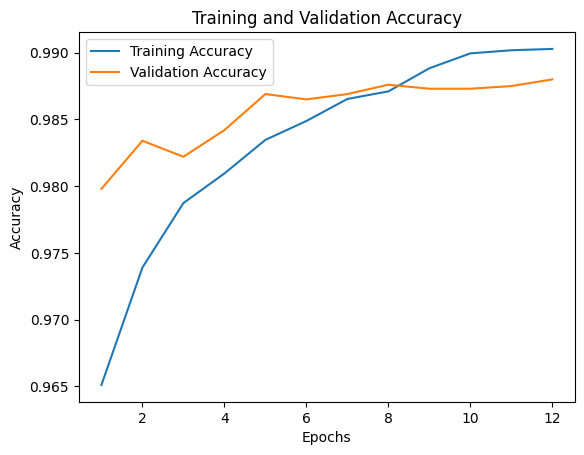

In [54]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

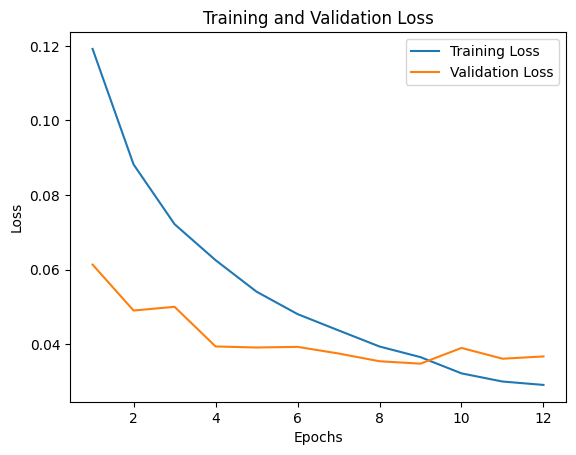

In [55]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()